In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
import json
%matplotlib inline

In [7]:
os.getcwd()

'/Users/ryanfisher/Documents/Springboard/Springboard/Capstone 2/3405-6663-bundle-archive'

In [8]:
os.listdir('/Users/ryanfisher/Documents/Springboard/Springboard/Capstone 2/3405-6663-bundle-archive')

['links_small.csv',
 'Top_1000_Actors_Actresses.csv',
 'links.csv',
 'credits.csv',
 'Capstone 2 - Data Wrangling.ipynb',
 'movies_credits_actors',
 'Capstone 2 - EDA.ipynb',
 'Capstone 2 - Feature Engineering.ipynb',
 'credits.csv.zip',
 'movies_metadata.csv',
 'ratings.csv',
 'Capstone 2 - Modeling.ipynb',
 '.ipynb_checkpoints',
 'movies_credits',
 'ratings_small.csv',
 'keywords.csv']

In [242]:
movies_credits_actors = pd.read_csv('movies_credits_actors', header = 0,index_col = 'movieId')

In [165]:
movies_credits_actors

,adult,budget,imdb_id,original_language,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,new_genres,collection,director,a_list_sum,b_list_sum
movieId,,,,,,,,,,,,,,,,,,
862,False,30000000.0,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",Animation,Toy Story Collection,John Lasseter,1,1
8844,False,65000000.0,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,"Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...",Adventure,NaN,Joe Johnston,2,1
15602,False,0.0,tt0113228,en,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,"Walter Matthau,Jack Lemmon,Ann-Margret,Sophia ...",Romance,Grumpy Old Men Collection,Howard Deutch,4,0
31357,False,16000000.0,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,"Whitney Houston,Angela Bassett,Loretta Devine,...",Comedy,NaN,Forest Whitaker,1,1
11862,False,0.0,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,"Steve Martin,Diane Keaton,Martin Short,Kimberl...",Comedy,Father of the Bride Collection,Charles Shyer,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,False,0.0,tt6209470,fa,0.072051,[],NaN,0.0,90.0,Subdue,4.0,1.0,"Leila Hatami,Kourosh Tahami,Elham Korda",Drama,NaN,Hamid Nematollah,0,0
111109,False,0.0,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",2011-11-17,0.0,360.0,Century of Birthing,9.0,3.0,"Angel Aquino,Perry Dizon,Hazel Orencio,Joel To...",Drama,NaN,Lav Diaz,0,0
67758,False,0.0,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",2003-08-01,0.0,90.0,Betrayal,3.8,6.0,"Erika Eleniak,Adam Baldwin,Julie du Page,James...",Action,NaN,Mark L. Lester,0,0


In [247]:
movies_credits_actors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 862 to 461257
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45538 non-null  bool   
 1   budget                45538 non-null  float64
 2   imdb_id               45521 non-null  object 
 3   original_language     45527 non-null  object 
 4   popularity            45535 non-null  float64
 5   production_companies  45535 non-null  object 
 6   release_date          45451 non-null  object 
 7   revenue               45535 non-null  float64
 8   runtime               45278 non-null  float64
 9   title                 45535 non-null  object 
 10  vote_average          45535 non-null  float64
 11  vote_count            45535 non-null  float64
 12  cast                  43118 non-null  object 
 13  new_genres            43096 non-null  object 
 14  collection            4500 non-null   object 
 15  director        

### Removing Outliers

In [256]:
movies_credits_actors_no = movies_credits_actors[(np.abs(stats.zscore(movies_credits_actors['budget'])) < 3)]

,adult,budget,imdb_id,original_language,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,new_genres,collection,director,a_list_sum,b_list_sum
movieId,,,,,,,,,,,,,,,,,,
862,False,30000000.0,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",Animation,Toy Story Collection,John Lasseter,1,1
15602,False,0.0,tt0113228,en,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,"Walter Matthau,Jack Lemmon,Ann-Margret,Sophia ...",Romance,Grumpy Old Men Collection,Howard Deutch,4,0
31357,False,16000000.0,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,"Whitney Houston,Angela Bassett,Loretta Devine,...",Comedy,NaN,Forest Whitaker,1,1
11862,False,0.0,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,"Steve Martin,Diane Keaton,Martin Short,Kimberl...",Comedy,Father of the Bride Collection,Charles Shyer,2,0
45325,False,0.0,tt0112302,en,2.561161,"[{'name': 'Walt Disney Pictures', 'id': 2}]",1995-12-22,0.0,97.0,Tom and Huck,5.4,45.0,"Jonathan Taylor Thomas,Brad Renfro,Rachael Lei...",Action,NaN,Peter Hewitt,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,False,0.0,tt6209470,fa,0.072051,[],NaN,0.0,90.0,Subdue,4.0,1.0,"Leila Hatami,Kourosh Tahami,Elham Korda",Drama,NaN,Hamid Nematollah,0,0
111109,False,0.0,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",2011-11-17,0.0,360.0,Century of Birthing,9.0,3.0,"Angel Aquino,Perry Dizon,Hazel Orencio,Joel To...",Drama,NaN,Lav Diaz,0,0
67758,False,0.0,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",2003-08-01,0.0,90.0,Betrayal,3.8,6.0,"Erika Eleniak,Adam Baldwin,Julie du Page,James...",Action,NaN,Mark L. Lester,0,0


In [257]:
movies_credits_actors_no = movies_credits_actors[(np.abs(stats.zscore(movies_credits_actors['popularity'])) < 3)]

/Users/ryanfisher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [258]:
movies_credits_actors_no = movies_credits_actors[(np.abs(stats.zscore(movies_credits_actors['revenue'])) < 3)]

/Users/ryanfisher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [259]:
movies_credits_actors_no = movies_credits_actors[(np.abs(stats.zscore(movies_credits_actors['runtime'])) < 3)]

/Users/ryanfisher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [260]:
movies_credits_actors_no = movies_credits_actors[(np.abs(stats.zscore(movies_credits_actors['vote_average'])) < 3)]

/Users/ryanfisher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [261]:
movies_credits_actors_no = movies_credits_actors[(np.abs(stats.zscore(movies_credits_actors['vote_count'])) < 3)]

/Users/ryanfisher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [262]:
movies_credits_actors_no = movies_credits_actors[(np.abs(stats.zscore(movies_credits_actors['a_list_sum'])) < 3)]

In [263]:
movies_credits_actors_no = movies_credits_actors[(np.abs(stats.zscore(movies_credits_actors['b_list_sum'])) < 3)]

In [264]:
movies_credits_actors_no

,adult,budget,imdb_id,original_language,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,new_genres,collection,director,a_list_sum,b_list_sum
movieId,,,,,,,,,,,,,,,,,,
862,False,30000000.0,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",Animation,Toy Story Collection,John Lasseter,1,1
8844,False,65000000.0,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,"Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...",Adventure,NaN,Joe Johnston,2,1
15602,False,0.0,tt0113228,en,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,"Walter Matthau,Jack Lemmon,Ann-Margret,Sophia ...",Romance,Grumpy Old Men Collection,Howard Deutch,4,0
31357,False,16000000.0,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,"Whitney Houston,Angela Bassett,Loretta Devine,...",Comedy,NaN,Forest Whitaker,1,1
11862,False,0.0,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,"Steve Martin,Diane Keaton,Martin Short,Kimberl...",Comedy,Father of the Bride Collection,Charles Shyer,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,False,0.0,tt6209470,fa,0.072051,[],NaN,0.0,90.0,Subdue,4.0,1.0,"Leila Hatami,Kourosh Tahami,Elham Korda",Drama,NaN,Hamid Nematollah,0,0
111109,False,0.0,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",2011-11-17,0.0,360.0,Century of Birthing,9.0,3.0,"Angel Aquino,Perry Dizon,Hazel Orencio,Joel To...",Drama,NaN,Lav Diaz,0,0
67758,False,0.0,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",2003-08-01,0.0,90.0,Betrayal,3.8,6.0,"Erika Eleniak,Adam Baldwin,Julie du Page,James...",Action,NaN,Mark L. Lester,0,0


In [265]:
movies_credits_actors2 = movies_credits_actors_no[['revenue','popularity','budget','runtime', 'vote_average','vote_count','a_list_sum', 'b_list_sum']]

In [266]:
movies_credits_actors2

,revenue,popularity,budget,runtime,vote_average,vote_count,a_list_sum,b_list_sum
movieId,,,,,,,,
862,373554033.0,21.946943,30000000.0,81.0,7.7,5415.0,1,1
8844,262797249.0,17.015539,65000000.0,104.0,6.9,2413.0,2,1
15602,0.0,11.712900,0.0,101.0,6.5,92.0,4,0
31357,81452156.0,3.859495,16000000.0,127.0,6.1,34.0,1,1
11862,76578911.0,8.387519,0.0,106.0,5.7,173.0,2,0
...,...,...,...,...,...,...,...,...
439050,0.0,0.072051,0.0,90.0,4.0,1.0,0,0
111109,0.0,0.178241,0.0,360.0,9.0,3.0,0,0
67758,0.0,0.903007,0.0,90.0,3.8,6.0,0,0


In [130]:
movies_credits_actors2.dtypes

revenue         float64
popularity      float64
budget          float64
runtime         float64
vote_average    float64
vote_count      float64
a_list_sum        int64
b_list_sum        int64
dtype: object

## Linear Regression

In [289]:
#movies_credits_actors2 = movies_credits_actors.notna()
movies_credits_actors2.dropna(inplace=True)
X, y = movies_credits_actors2[['popularity','vote_count','revenue','budget','a_list_sum', 'b_list_sum']], movies_credits_actors2['vote_average']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

/Users/ryanfisher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.03516580218050447

In [291]:
lr.score(X_test,y_test)

TypeError: predict() takes 2 positional arguments but 3 were given

In [269]:
lr.coef_

array([ 5.25545957e-02,  1.90803768e-04, -6.92914722e-09,  1.73419597e-01,
        6.62131076e-02])

## Random Forrest Regressor

In [292]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
regr.score(X_train, y_train)

0.5875043991126764

In [271]:
regr.score(X_test,y_test)

0.5804430180700546

## SVM

In [272]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_train, y_train)

-0.03775260522379398

In [287]:
test_set_pred = regr.predict(X_test)

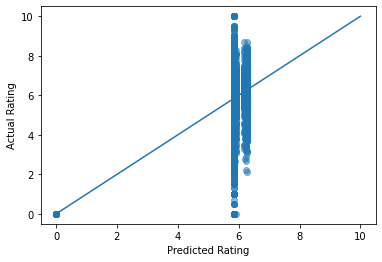

In [288]:
plt.scatter(test_set_pred, y_test, alpha=.5)
plt.plot(np.linspace(0,10), np.linspace(0,10))
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating');